In [158]:
import numpy as np
from scipy.stats import moyal
from scipy.stats import norm
import uproot as up
import awkward as ak
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [159]:
infile_name = '/Users/dea6/MuICSim/muic-1k.root'

infile = up.open(infile_name)

print(type(infile))

<class 'uproot.reading.ReadOnlyDirectory'>


In [160]:
keys = infile.keys()

print(keys)

['metadata;1', 'events;1']


In [161]:
events = infile['events']

print(type(events))

<class 'uproot.models.TTree.Model_TTree_v20'>


In [162]:
branches = infile['events'].keys()

for branch in branches:
    print(f"{branch:20s} {infile['events'][branch]}")

vsize_gen            <TBranch 'vsize_gen' at 0x000173c7dcd0>
gen_e_before_nozzle  <TBranchElement 'gen_e_before_nozzle' at 0x000173d7e690>
gen_e_after_nozzle   <TBranchElement 'gen_e_after_nozzle' at 0x000173df2e10>
gen_e_deposited_nozzle <TBranchElement 'gen_e_deposited_nozzle' at 0x000173ed47d0>


In [163]:
Emugen  = infile['events']['gen_e_before_nozzle']
Emu  = infile['events']['gen_e_after_nozzle']
Edep  = infile['events']['gen_e_deposited_nozzle']

In [164]:
print('Edep len = ',len(Edep.array()))
print('Edep = ',Edep.array())

Edep len =  1000
Edep =  [[117], [690], [118], [112], [158], ..., [179], [196], [169], [151], [204]]


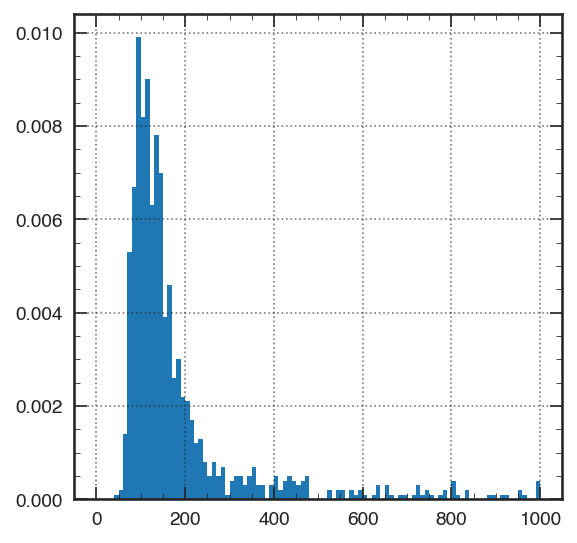

In [165]:
lower = 0
upper = 1000
n, bins, patches = plt.hist(Edep.array(), density=True, bins=100, histtype='stepfilled',  range=(lower,upper))

In [166]:
print('Emu len = ',len(Emu.array()))
print('Emu = ',Emu.array())

Emu len =  1000
Emu =  [[883], [310], [882], [888], [842], ..., [821], [804], [831], [849], [796]]


In [167]:
lower = 0
upper = 1000
FitEdep = Emu.array()
fit_i = 800
fit_f = 925
fit = FitEdep[(FitEdep >= fit_i) & (FitEdep <= fit_f)]
myfit = ak.flatten(fit)
(mu, sigma) = norm.fit(myfit)
coefficient = len(myfit)/len(Emu.array())

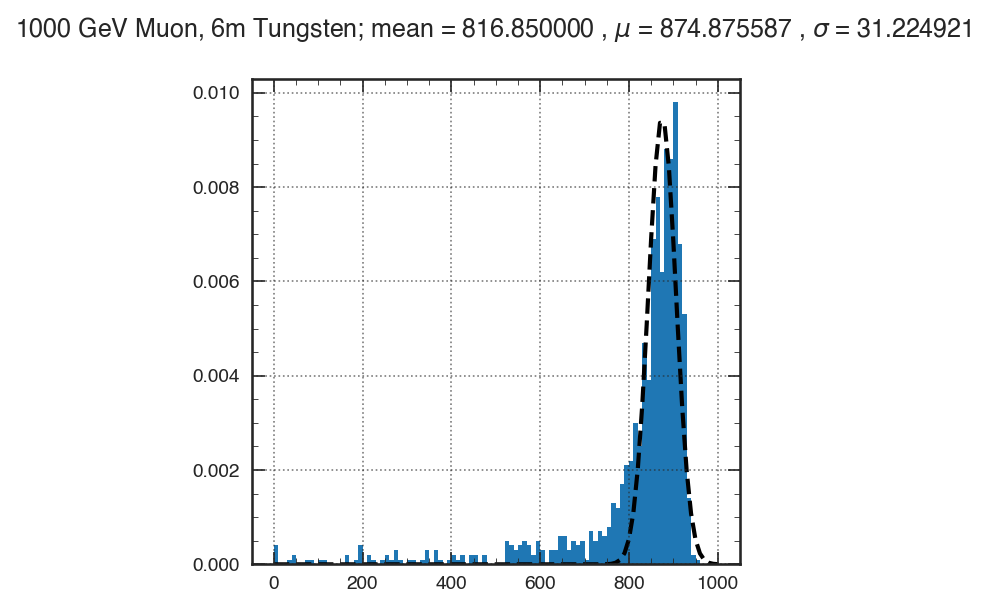

In [168]:
n, bins, patches = plt.hist(Emu.array(), density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('1000 GeV Muon, 6m Tungsten; mean = %f , $\mu$ = %f , $\sigma$ = %f \n' %(mean, mu, sigma), fontsize=12)
plt.show()